In [12]:
using LinearAlgebra
using Random
using Plots

In [4]:
A = [2 5; 1 2]
b = [21; 8]

2-element Vector{Int64}:
 21
  8

In [6]:
F = lu(A, Val(false))

LU{Float64, Matrix{Float64}}
L factor:
2×2 Matrix{Float64}:
 1.0  0.0
 0.5  1.0
U factor:
2×2 Matrix{Float64}:
 2.0   5.0
 0.0  -0.5

In [8]:
x = A\b

2-element Vector{Float64}:
 -2.0
  5.0

In [9]:
F = lu(A)

LU{Float64, Matrix{Float64}}
L factor:
2×2 Matrix{Float64}:
 1.0  0.0
 0.5  1.0
U factor:
2×2 Matrix{Float64}:
 2.0   5.0
 0.0  -0.5

In [10]:
qrA = qr(A)

LinearAlgebra.QRCompactWY{Float64, Matrix{Float64}}
Q factor:
2×2 LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}}:
 -0.894427  -0.447214
 -0.447214   0.894427
R factor:
2×2 Matrix{Float64}:
 -2.23607  -5.36656
  0.0      -0.447214

In [11]:
x = qrA\b

2-element Vector{Float64}:
 -1.9999999999999996
  5.000000000000001

In [54]:
phi = pi/7
a = 2
b = 1.5
x_0 = 3
y_0 = -1

fx(t) = a*cos(phi)*cos(t) - b*sin(phi)*sin(t) + x_0
fy(t) = a*sin(phi)*sin(t) + b*cos(phi)*cos(t) + y_0

N = 100
ts = LinRange(0, 2*pi, N)
x = fx.(ts)
y = fy.(ts)

100-element Vector{Float64}:
  0.3514533018536288
  0.40376960394402106
  0.45043342129106523
  0.49125685517200823
  0.5260755240269881
  0.5547492253655586
  0.5771625003126328
  0.5932250985206253
  0.6028723415757455
  0.6060653834351455
  0.6027913668462217
  0.5930634751182335
  0.5769208790377713
  ⋮
 -0.5225168910786997
 -0.42622106999648013
 -0.33223565415368683
 -0.24093908964835087
 -0.15269899552318322
 -0.06787068349343284
  0.013204272767978198
  0.09019941302708712
  0.16280470502902578
  0.23072779288848766
  0.29369517430369374
  0.35145330185362855

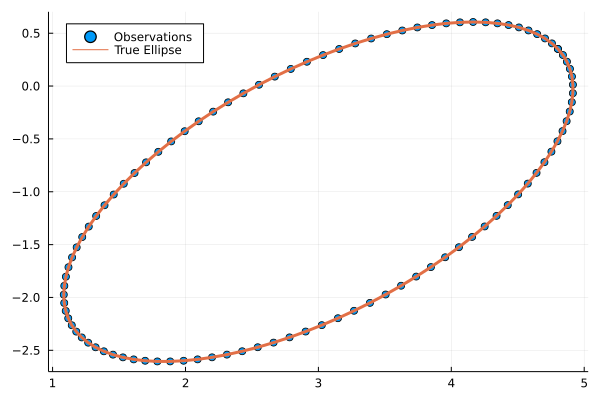

In [55]:
plot(x,y, seriestype =:scatter, label = "Observations", legend =:topleft)
plot!(fx.(ts), fy.(ts), linewidth = 3, label = "True Ellipse")

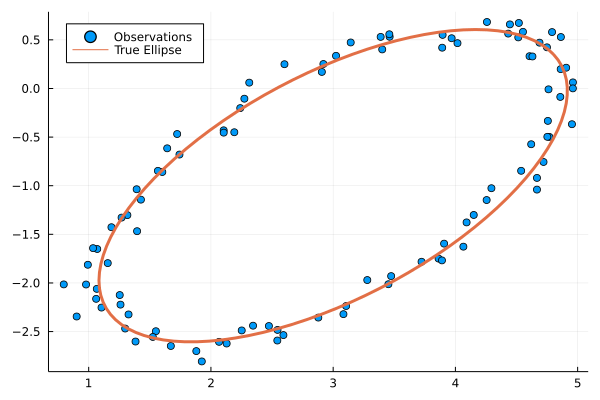

In [57]:
#Add random values to our scatterplot!

x = fx.(ts) + randn(N)*0.1
y = fy.(ts) + randn(N)*0.1

plot(x,y, seriestype =:scatter, label = "Observations", legend =:topleft)
plot!(fx.(ts), fy.(ts), linewidth = 3, label = "True Ellipse")

In [59]:
#### Define your matrix as the general conic equation
A = [x.^2 y.^2 x.*y x y]
# Define b as a vector containing N number of ones
b = ones(N)
# Use LU factoriztion to solve for the constants
p = A\b

5-element Vector{Float64}:
 -0.08124374508445446
 -0.1092061146146906
  0.11749912213700178
  0.6018526894288133
 -0.5697919528088768

In [60]:
# Create for loops that satify the points of our N number of equations 
X = LinRange(minimum(x), maximum(x), N)
Y = LinRange(minimum(y), maximum(y), N)
F = Array{Float64}(undef,N,N)
for i in 1:N
    for j in 1:N
        F[i,j] = p[1]*X[i]^2 + p[2]*Y[j]^2 + p[3]*X[i]*Y[j] + p[4]*X[i] + p[5]*Y[j]
    end
end

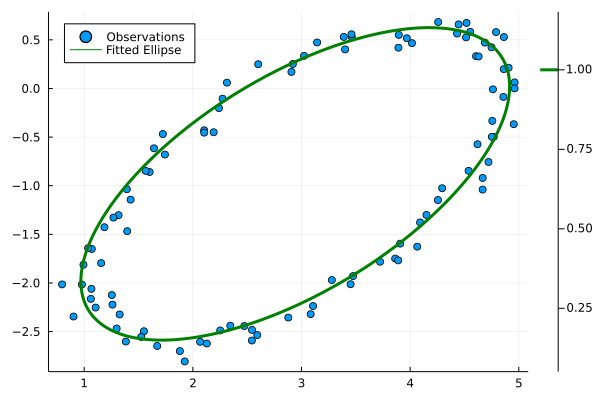

In [63]:
# Plot the scattered plot and the fitted ellipse

plot(x,y,seriestype =:scatter, label = "Observations", legend =:topleft)
    contour!(X, Y, F, linewidth=3, levels=[1], color=:green)
    plot!([], color=:green, label="Fitted Ellipse")